In [387]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [388]:
df = pd.read_csv(filepath_or_buffer='data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [390]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [391]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


<Axes: >

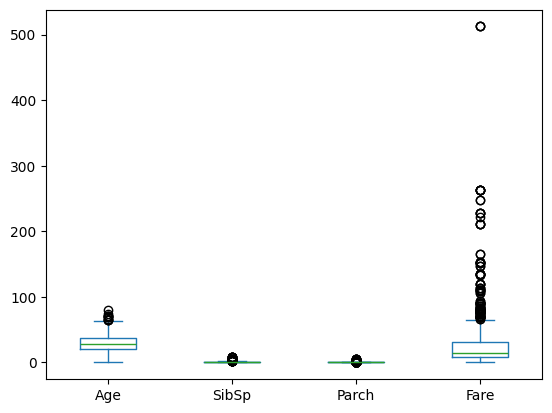

In [392]:
df.iloc[:, 3:].plot(kind='box')

In [393]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [394]:
df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)
df.replace({'': np.nan}, inplace=True)
df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)
df.dropna(inplace=True)

In [ ]:
df['Embarked'].fillna('S', inplace=True)
df['isAlone'] = ((df['SibSp'] + df['Parch']) == 0).astype(int)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,isAlone
0,1,0,3,male,22.0,1,0,7.2500,S,0
1,2,1,1,female,38.0,1,0,71.2833,C,0
2,3,1,3,female,26.0,0,0,7.9250,S,0
3,4,1,1,female,35.0,1,0,53.1000,S,0
4,5,0,3,male,35.0,0,0,8.0500,S,0


<Axes: >

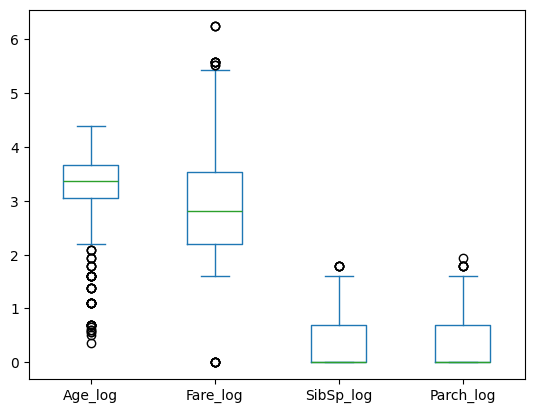

In [396]:
df['Age_log'] = np.log1p(df['Age'])
df['Fare_log'] = np.log1p(df['Fare'])
df['SibSp_log'] = np.log1p(df['SibSp'])
df['Parch_log'] = np.log1p(df['Parch'])
df[['Age_log', 'Fare_log','SibSp_log','Parch_log']].plot(kind='box')

In [397]:
df.drop(columns=['Age', 'Fare', 'SibSp', 'Parch'], inplace=True)
df['Sex'] = df['Sex'].replace({'male': 1, 'female':0})
df = pd.get_dummies(df,prefix=['Embarked'], drop_first=True, dtype=int)

In [398]:
df.head()

,PassengerId,Survived,Pclass,Sex,isAlone,Age_log,Fare_log,SibSp_log,Parch_log,Embarked_Q,Embarked_S
0,1,0,3,1,0,3.135494,2.110213,0.693147,0.0,0,1
1,2,1,1,0,0,3.663562,4.280593,0.693147,0.0,0,0
2,3,1,3,0,0,3.295837,2.188856,0.000000,0.0,0,1
3,4,1,1,0,0,3.583519,3.990834,0.693147,0.0,0,1
4,5,0,3,1,0,3.583519,2.202765,0.000000,0.0,0,1


In [399]:
df['Survived'].value_counts(normalize=True).round(2) * 100

Survived
0    60.0
1    40.0
Name: proportion, dtype: float64

In [400]:
from sklearn.model_selection import train_test_split

X=df.drop(columns=['PassengerId','Survived'])
y=df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True, stratify=y)

In [401]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_features = ['Age_log', 'Fare_log','SibSp_log','Parch_log']
categorical_features = ['Pclass','Sex','isAlone','Embarked_Q','Embarked_S']

X_train_scaled_numeric = scaler.fit_transform(X_train[numeric_features])
X_test_scaled_numeric = scaler.transform(X_test[numeric_features])

X_train_scaled_numeric = pd.DataFrame(X_train_scaled_numeric, columns=numeric_features, index=X_train.index)
X_test_scaled_numeric = pd.DataFrame(X_test_scaled_numeric, columns=numeric_features, index=X_test.index)

X_train_categorical = X_train[categorical_features]
X_test_categorical = X_test[categorical_features]

X_train_final = pd.concat([X_train_scaled_numeric, X_train_categorical], axis=1)
X_test_final = pd.concat([X_test_scaled_numeric, X_test_categorical], axis=1)


In [402]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [2, 5, 10],
    'class_weight': ['balanced']
}

model = RandomForestClassifier(random_state=42)
grid = GridSearchCV(model,param_grid=param_grid, scoring=['precision','recall'], cv=5, refit='recall')
grid.fit(X_train_final, y_train)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'class_weight': ['balanced'], 'max_depth': [2, 5, ...], 'n_estimators': [100, 150, ...]}"
,scoring,"['precision', 'recall']"
,n_jobs,None
,refit,'recall'
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,150


In [403]:
print(grid.best_params_)
best_model = grid.best_estimator_

{'class_weight': 'balanced', 'max_depth': 5, 'n_estimators': 150}


              precision    recall  f1-score   support

           0       0.82      0.83      0.83       106
           1       0.75      0.74      0.74        72

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



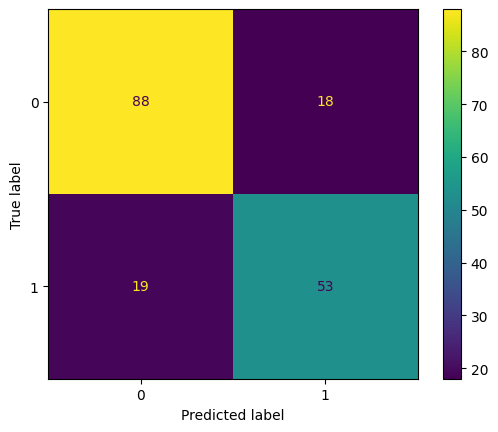

In [404]:
y_pred = best_model.predict(X_test_final)

from sklearn.metrics import ConfusionMatrixDisplay, classification_report
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

----

In [405]:
predecir = pd.read_csv('data/test.csv')

In [406]:
predecir.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [407]:
predecir.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [408]:
predecir.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [409]:
predecir.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)
predecir.replace({'': np.nan}, inplace=True)
predecir.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)
predecir['Age'].fillna(0, inplace= True)
predecir['Fare'].fillna(0, inplace=True)

In [ ]:
predecir['Embarked'].fillna('S', inplace=True)
predecir['isAlone'] = ((predecir['SibSp'] + predecir['Parch']) == 0).astype(int)
predecir.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,isAlone
0,892,3,male,34.5,0,0,7.8292,Q,0
1,893,3,female,47.0,1,0,7.0000,S,0
2,894,2,male,62.0,0,0,9.6875,Q,0
3,895,3,male,27.0,0,0,8.6625,S,0
4,896,3,female,22.0,1,1,12.2875,S,1


<Axes: >

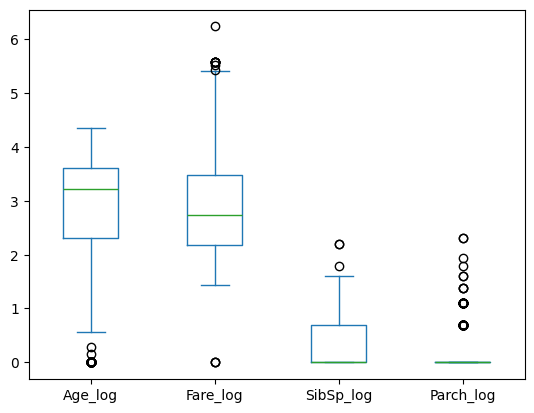

In [411]:
predecir['Age_log'] = np.log1p(predecir['Age'])
predecir['Fare_log'] = np.log1p(predecir['Fare'])
predecir['SibSp_log'] = np.log1p(predecir['SibSp'])
predecir['Parch_log'] = np.log1p(predecir['Parch'])
predecir[['Age_log', 'Fare_log','SibSp_log','Parch_log']].plot(kind='box')

In [412]:
predecir.drop(columns=['Age', 'Fare', 'SibSp', 'Parch'], inplace=True)
predecir['Sex'] = predecir['Sex'].replace({'male': 1, 'female':0})
predecir = pd.get_dummies(predecir,prefix=['Embarked'], drop_first=True, dtype=int)

In [413]:
predecir.head()

,PassengerId,Pclass,Sex,isAlone,Age_log,Fare_log,SibSp_log,Parch_log,Embarked_Q,Embarked_S
0,892,3,1,0,3.569533,2.178064,0.000000,0.000000,1,0
1,893,3,0,0,3.871201,2.079442,0.693147,0.000000,0,1
2,894,2,1,0,4.143135,2.369075,0.000000,0.000000,1,0
3,895,3,1,0,3.332205,2.268252,0.000000,0.000000,0,1
4,896,3,0,1,3.135494,2.586824,0.693147,0.693147,0,1


In [414]:
X = predecir.drop(columns=['PassengerId'])

In [415]:
numeric_features = ['Age_log', 'Fare_log','SibSp_log','Parch_log']
categorical_features = ['Pclass','Sex','isAlone','Embarked_Q','Embarked_S']

X_scaled_numeric = scaler.transform(X[numeric_features])
X_scaled_numeric = pd.DataFrame(X_scaled_numeric, columns=numeric_features, index=X.index)

X_categorical = X[categorical_features]

X_final = pd.concat([X_scaled_numeric, X_categorical], axis=1)

In [416]:
prediccion = best_model.predict(X_final)

In [417]:
submision = pd.DataFrame({'PassengerId': predecir['PassengerId'], 'Survived': prediccion})  
submision

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,1
414,1306,1
415,1307,0
416,1308,1


In [418]:
submision.to_csv('titanic_submission.csv', index=False)